In [1]:
from urllib import request
import xml.etree.ElementTree as ET
from io import BytesIO
import pandas as pd

dates = []
vals = []

for page_i in range(1, 3):
    req = request.urlopen(f"http://api.worldbank.org/countries/fin/indicators/SL.UEM.TOTL.ZS?page={page_i}")
    data = req.read()
    root = ET.parse(BytesIO(data)).getroot()

    for child in root:
        dateEl = child.find("{http://www.worldbank.org}date")
        valEl = child.find("{http://www.worldbank.org}value")
        
        if (dateEl.text is not None) and (valEl.text is not None):
            dates.append(int(dateEl.text))
            vals.append(float(valEl.text))

empl_df = pd.DataFrame({"year": dates, "unemployment": vals})
empl_df = empl_df.sort_values("year")

empl_df.head(10)

,year,unemployment
18,1991,6.503000
17,1992,11.595000
16,1993,16.201000
15,1994,16.426001
14,1995,17.004999
13,1996,15.572000
12,1997,14.967000
11,1998,13.214000
10,1999,11.693000
9,2000,11.134000


In [2]:
dates = []
vals = []

for page_i in range(1, 3):
    req = request.urlopen(f"http://api.worldbank.org/countries/fin/indicators/NY.GDP.MKTP.CN?page={page_i}")
    data = req.read()
    root = ET.parse(BytesIO(data)).getroot()

    for child in root:
        dateEl = child.find("{http://www.worldbank.org}date")
        valEl = child.find("{http://www.worldbank.org}value")
        
        if (dateEl.text is not None) and (valEl.text is not None):
            dates.append(int(dateEl.text))
            vals.append(float(valEl.text))
            
gdp_df = pd.DataFrame({"year": dates, "gdp": vals})
gdp_df = gdp_df.sort_values("year")

gdp_df.head(10)

,year,gdp
49,1960,2.811619e+09
48,1961,3.187045e+09
47,1962,3.412509e+09
46,1963,3.706012e+09
45,1964,4.180025e+09
44,1965,4.622795e+09
43,1966,4.956041e+09
42,1967,5.436309e+09
41,1968,6.232452e+09
40,1969,7.113831e+09


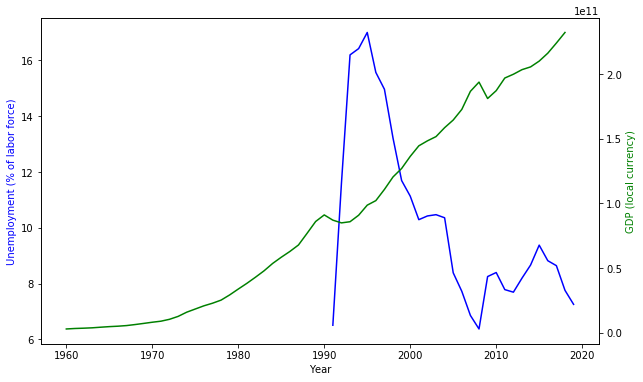

In [12]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (10, 6))
plt.plot(empl_df["year"], empl_df["unemployment"], color = "b")
ax1.set_xlabel("Year")
ax1.set_ylabel("Unemployment (% of labor force)", color = "b")
ax2 = ax1.twinx()
plt.plot(gdp_df["year"], gdp_df["gdp"], color = "g")
ax2.set_ylabel("GDP (local currency)", color = "g")
plt.savefig("unemployment_vs_gdp.pdf")
plt.show()